# New Chapter III

In [1]:
import networkx as nx
from bs4 import BeautifulSoup

[Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) permits to open strange files like SVN or html and explore them

In [2]:
from ipywidgets import interact
from ipywidgets import FloatSlider
from ipywidgets import IntSlider

[ipywidgets](https://ipywidgets.readthedocs.io/en/stable/index.html) allows to dynamically modify some plot, functions or whatever

In [3]:
import matplotlib.pyplot as plt

[Matplotlib](https://matplotlib.org/) is the standard for plotting in python.

In [4]:
from matplotlib import cm

In [5]:
import random

[random](https://docs.python.org/2/library/random.html) is a module containing functions for generating (pseudo-)random numbers

In [6]:
%matplotlib inline

This command permits to have the plot inside the otebook (otherwise it returns a windows with the plot)

## File from SVG

In [7]:
#getting the network in the SVG format 
SVG_file="./Notebook_Chapter_III_Internet/data/test_graph.svg"

In [8]:
    op = open(SVG_file,"r")
    xml = op.read()
    
    soup = BeautifulSoup(xml)
    op.close()

In [9]:
soup

<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n<!-- Created with svg-rocco-library v0.2 -->\n<svg height="800" id="rocco" version="1.0" width="800" xmlns="http://www.w3.org/2000/svg" xmlns:svg="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n<g id="layer1">\n<line style="fill:none;stroke:#000000;stroke-width:4;stroke-opacity:1;stroke-dasharray:none" x1="87.823" x2="135.772" y1="235.898" y2="207.394"></line>\n<line style="fill:none;stroke:#000000;stroke-width:4;stroke-opacity:1;stroke-dasharray:none" x1="135.772" x2="132.986" y1="207.394" y2="255.878"></line>\n<line style="fill:none;stroke:#000000;stroke-width:4;stroke-opacity:1;stroke-dasharray:none" x1="132.986" x2="87.823" y1="255.878" y2="235.898"></line>\n<line style="fill:none;stroke:#000000;stroke-width:4;stroke-opacity:1;stroke-dasharray:none" x1="87.823" x2="155" y1="235.898" y2="101"></line>\n<line style="fill:none;stroke:#000000;stroke-width:4;stroke-opacity:1;stroke-dasharray:none" x1="155" 

Edges are indentified by the line style, x1, x2, y1, y2.  In the following we are interested in getting the coordinates of the nodes

In [10]:
attrs = {
        "line" :  ["x1","y1","x2","y2"]
    }

In [11]:
for att in attrs.keys():
    print att==attrs.keys()[0]

True


In [12]:
lines=soup.findAll("line")

In [13]:
lines

[<line style="fill:none;stroke:#000000;stroke-width:4;stroke-opacity:1;stroke-dasharray:none" x1="87.823" x2="135.772" y1="235.898" y2="207.394"></line>,
 <line style="fill:none;stroke:#000000;stroke-width:4;stroke-opacity:1;stroke-dasharray:none" x1="135.772" x2="132.986" y1="207.394" y2="255.878"></line>,
 <line style="fill:none;stroke:#000000;stroke-width:4;stroke-opacity:1;stroke-dasharray:none" x1="132.986" x2="87.823" y1="255.878" y2="235.898"></line>,
 <line style="fill:none;stroke:#000000;stroke-width:4;stroke-opacity:1;stroke-dasharray:none" x1="87.823" x2="155" y1="235.898" y2="101"></line>,
 <line style="fill:none;stroke:#000000;stroke-width:4;stroke-opacity:1;stroke-dasharray:none" x1="155" x2="135.772" y1="101" y2="207.394"></line>,
 <line style="fill:none;stroke:#000000;stroke-width:4;stroke-opacity:1;stroke-dasharray:none" x1="117.09" x2="59" y1="336.886" y2="305"></line>,
 <line style="fill:none;stroke:#000000;stroke-width:4;stroke-opacity:1;stroke-dasharray:none" x1="5

### Routine

In [15]:
def Graph_from_SVG(stream_in, stream_out):

    G=nx.Graph()
    
    attrs = {
        "line" :  ["x1","y1","x2","y2"]
    }
    # define a dictionary where the edge is defined by a couple of couple of coordinates
    
    op = open(stream_in,"r")
    xml = op.read()
    op.close()
    
    soup = BeautifulSoup(xml)
    # BeautifulSoap reads html files or anything strange

    
    count=0
    # attribute counter
    node_diz={}
    # list of the nodes. It's a dictionary.
    pos={}
    # list of the node positions. It's a dictionary
    tmps = soup.findAll("line")
    for t in tmps:
        node1=(t['x1'],t['y1'])
        node2=(t['x2'],t['y2'])
        # node_diz is the node dictionary. If node1
        # is not present in the dictionary,
        # it adds it to the list and give it the name of the last node in the list+1
        if not node_diz.has_key(node1):
            node_diz[node1]=str(count)
            pos[str(count)]=(float(node1[0]),float(node1[1]))
            count+=1
        if not node_diz.has_key(node2):
            node_diz[node2]=str(count)
            pos[str(count)]=(float(node2[0]),float(node2[1]))
            count+=1
        G.add_edge(node_diz[node1],node_diz[node2])
        # finally it adds the node to the Graph
        
        # WHY USING THE DICTIONARY INSTEAD OF USING THE JUST READ SVG FILE?
        
    #save the graph in an edge list format
    nx.write_edgelist(G, stream_out,data=False)
    # finally, it returns both the networkX graph and the pos dictionary
    return G,pos

### Evaluation and plot

In [16]:
#getting the network in the SVG format 
SVG_file="./Notebook_Chapter_III_Internet/data/test_graph.svg"
dat_file="./Notebook_Chapter_III_Internet/data/test_graph.dat"
(G,pos)=Graph_from_SVG(SVG_file,dat_file)

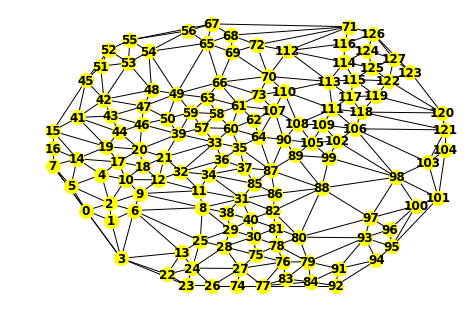

In [20]:
#plot the optimal node distribution
nx.draw(G, pos, node_size = 200, node_color='yellow', with_labels=True, font_weight='bold')
#save the graph on a figure file
plt.savefig("./Notebook_Chapter_III_Internet/data/test_network_best.png", dpi=200)

## iwidgets

In [24]:
def unc_netw(th):
    G_sel=nx.Graph()
    edge_sel=[ii for ii in list(G.edges) if int(ii[0])<th and int(ii[1])<th]
    #print edge_sel
    G_sel.add_edges_from(edge_sel)
    nx.draw(G_sel, pos=pos, node_size = 200, node_color='darkturquoise', with_labels=True, font_weight='bold')
    plt.show()

In [23]:
max_node=len(list(G.nodes))
max_node

128

In [25]:
interact(unc_netw, th=IntSlider(min=2, max=max_node, step=1, value=42))#, continuous_update=False))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT00MiwgZGVzY3JpcHRpb249dSd0aCcsIG1heD0xMjgsIG1pbj0yKSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHUnd2lkZ2XigKY=


<function __main__.unc_netw>

### Weighted network

In [26]:
W=nx.Graph()

In [32]:
rw_edgelist=[(i[0], i[1], random.randint(1, 100)) for i in list(G.edges())]
#rw_edgelist

In [28]:
W.add_weighted_edges_from(rw_edgelist)

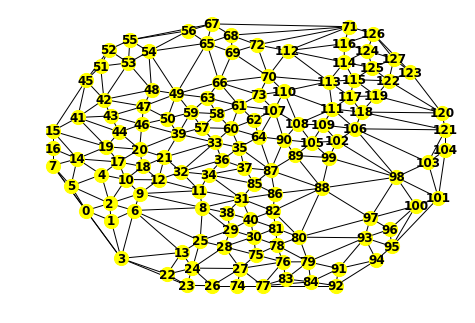

In [30]:
nx.draw(W, pos, node_size = 200, node_color='yellow', with_labels=True, font_weight='bold')

No different respect to the previous plot, but...

In [33]:
weights=[i[2]/100. for i in list(W.edges.data('weight'))]

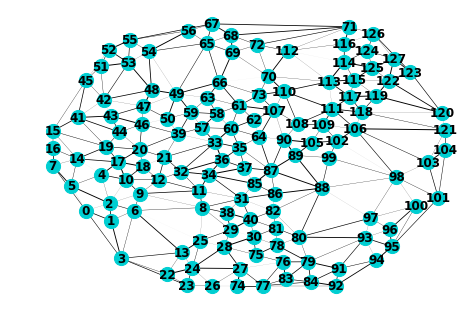

In [37]:
nx.draw(nx.empty_graph())
# it sort of defines the space to plot the network
nx.draw_networkx_edges(W, pos, edgelist=W.edges, width=weights)
# first plot the weigthed edges...
nx.draw_networkx_nodes(W, pos, nodelist=W.nodes, node_size = 200, node_color='darkturquoise')
# ... then plot nodes...
nx.draw_networkx_labels(W, pos, font_weight='bold');
# ... and finally plot labels. The ";" is needed since nx.draw_..._labels return the dictionary of the label.

## Exercise

Use iwidget to percolate the network.

In [118]:
def perc_th(th):
    gr = nx.Graph()
    new_edges = [ii for ii in list(W.edges.data('weight')) if int(ii[2])>th]
    gr.add_weighted_edges_from(new_edges)
    nx.draw(nx.empty_graph())
    nx.draw_networkx_edges(gr, pos, edgelist=gr.edges, width=gr.edges.data('weights'))
    nx.draw_networkx_nodes(gr, pos, nodelist=gr.nodes, node_size = 200, node_color='darkturquoise')
    nx.draw_networkx_labels(gr, pos, font_weight='bold')
    

### Solution of the exercise

In [82]:
def perc_netw(th):
    G_sel=nx.Graph()
    edge_sel=[ii for ii in list(W.edges.data('weight')) if ii[2]>th]
    #print edge_sel
    G_sel.add_weighted_edges_from(edge_sel)
    
    weights=[i[2]/100. for i in edge_sel]
    
    nx.draw(nx.empty_graph())
    # it sort of defines the space to plot the network
    nx.draw_networkx_edges(G_sel, pos, edgelist=G_sel.edges, width=weights)
    # first plot the weigthed edges...
    nx.draw_networkx_nodes(G_sel, pos, nodelist=G_sel.nodes, node_size = 100, node_color='darkturquoise')
    # ... then plot nodes...
    nx.draw_networkx_labels(G_sel, pos, font_weight='bold');
    
    plt.xlim(0,800)
    plt.ylim(0,800)

    plt.show()

In [119]:
interact(perc_th, th=IntSlider(min=1, max=100, step=1, value=42))#, continuous_update=False))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT00MiwgZGVzY3JpcHRpb249dSd0aCcsIG1pbj0xKSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHUnd2lkZ2V0LWludGVyYWPigKY=


<function __main__.perc_th>

### Centrality measures

#### Degree centrality

In [84]:
degree_centrality=nx.degree(G)
print degree_centrality

[('24', 7), ('25', 6), ('26', 4), ('27', 7), ('20', 7), ('21', 6), ('22', 4), ('23', 4), ('28', 6), ('29', 6), ('0', 5), ('4', 5), ('8', 7), ('119', 5), ('120', 5), ('121', 5), ('122', 6), ('123', 4), ('124', 5), ('125', 5), ('126', 5), ('127', 5), ('118', 6), ('59', 6), ('58', 5), ('55', 5), ('54', 6), ('57', 5), ('56', 4), ('51', 4), ('50', 5), ('53', 6), ('52', 4), ('115', 6), ('114', 6), ('88', 8), ('89', 5), ('111', 7), ('110', 6), ('113', 7), ('112', 6), ('82', 6), ('83', 4), ('80', 7), ('81', 5), ('86', 5), ('87', 8), ('84', 5), ('85', 5), ('3', 7), ('7', 5), ('108', 6), ('109', 5), ('102', 5), ('103', 5), ('100', 5), ('101', 5), ('106', 7), ('107', 7), ('104', 3), ('105', 6), ('39', 7), ('38', 4), ('33', 7), ('32', 6), ('31', 8), ('30', 6), ('37', 5), ('36', 5), ('35', 6), ('34', 6), ('60', 7), ('61', 7), ('62', 4), ('63', 5), ('64', 6), ('65', 7), ('66', 7), ('67', 5), ('68', 5), ('69', 5), ('2', 7), ('6', 7), ('99', 5), ('98', 8), ('91', 5), ('90', 6), ('93', 7), ('92', 4), (

The following function is intended to transform the dictionary in a list

In [85]:
l=[]
res=dict(degree_centrality)
# in the last version of Networkx nx.degree(G) in no more a dictionary
for n in G.nodes():
    if not res.has_key(n):
        res[n]=0.0
    l.append(res[n])

In [86]:
ll=[i[1] for i in list(nx.degree(G))]

In [87]:
l==ll

True

In [88]:
min(ll)

3

In [91]:
colors =[(n-min(ll))/float((max(ll)-min(ll))) for n in ll]
rgbs = [cm.get_cmap('jet')(color) for color in colors]

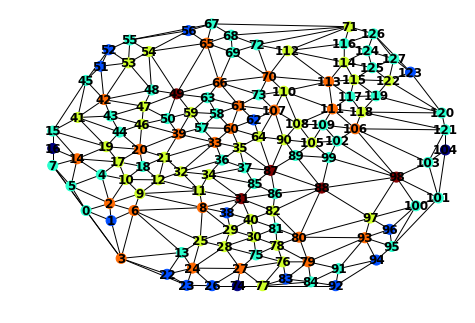

In [92]:
nx.draw(nx.empty_graph())
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_size = 100, node_color =rgbs)
nx.draw_networkx_labels(G, pos, font_weight='bold');

#### Exercise

Use ipywidgets to highlight the most central nodes

##### Solution

In [111]:
G_deg=dict(nx.degree(G))

In [101]:
def rgb_degree(deg):
    return cm.get_cmap('jet')((deg-min(ll))/float((max(ll)-min(ll))))

In [114]:
def deg_cent_netw(th):
    
    G_sel=nx.Graph()
    edge_sel=[ii for ii in list(G.edges) if G_deg[ii[0]]>=th and G_deg[ii[1]]>=th]
    #print edge_sel
    G_sel.add_edges_from(edge_sel)
    nx.draw(nx.empty_graph())
    nx.draw_networkx_edges(G_sel, pos, edgelist=G_sel.edges)
    new_rgbs=[rgb_degree(G_deg[i]) for i in list(G_sel.nodes)]
    nx.draw_networkx_nodes(G_sel, pos, nodelist=G_sel.nodes, node_size = 200, node_color =new_rgbs)
    nx.draw_networkx_labels(G_sel, pos, font_weight='bold');
    
    plt.xlim(0,800)
    plt.ylim(0,800)

    #nx.draw(G_sel, pos=pos, node_size = 100, node_color='darkturquoise', with_labels=True, font_weight='bold')
    plt.show()

In [115]:
interact(deg_cent_netw, th=IntSlider(min=min(ll), max=max(ll), step=1, value=max(ll)))#, continuous_update=False))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT04LCBkZXNjcmlwdGlvbj11J3RoJywgbWF4PTgsIG1pbj0zKSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHUnd2lkZ2V0LWnigKY=


<function __main__.deg_cent_netw>

### Betweenness centrality

In [120]:
list_of_nodes=list(G.nodes())
# the output data type changed in the last version of NetworkX
num_of_nodes=G.number_of_nodes()
bc={} #we will need this dictionary later on
for i in range(num_of_nodes-1):
    for j in range(i+1,num_of_nodes):
        paths=nx.all_shortest_paths(G,source=list_of_nodes[i], \
                                    target=list_of_nodes[j])
        # consider each couple of nodes and all shortest path connecting them
        count=0.0
        path_diz={}
        for p in paths:
            #print p
            count+=1.0
            # for each path, add 1 for each node visited
            for n in p[1:-1]:
                if not path_diz.has_key(n):
                    path_diz[n]=0.0
                path_diz[n]+=1.0
        for n in path_diz.keys():
            path_diz[n]=path_diz[n]/count
            # normalise the contribution by the number of shortest paths
            if not bc.has_key(n):
                bc[n]=0.0
            bc[n]+=path_diz[n]  

In [121]:
bc

{'0': 22.270196589745492,
 '1': 11.730122349835227,
 '10': 203.803367984183,
 '100': 55.235533939433154,
 '101': 172.6199408541909,
 '102': 40.63982698684509,
 '103': 197.18102695706065,
 '104': 40.37709946243334,
 '105': 113.48041159736265,
 '106': 837.6335395675678,
 '107': 543.0794814869903,
 '108': 271.1700655279161,
 '109': 45.40288699817482,
 '11': 487.07670494302533,
 '110': 444.2126775526593,
 '111': 687.677300758735,
 '112': 244.72232351767448,
 '113': 693.161499380956,
 '114': 163.89227431608757,
 '115': 126.8652889363146,
 '116': 55.114939713718734,
 '117': 83.0595261409651,
 '118': 266.45752835322713,
 '119': 46.84027438946589,
 '12': 331.2326302282369,
 '120': 267.93881930745414,
 '121': 249.7528485885772,
 '122': 81.03379160244738,
 '123': 140.10425370161488,
 '124': 18.321262522262565,
 '125': 17.258051182097905,
 '126': 199.04389278896267,
 '127': 21.605570593143167,
 '13': 109.5825853939762,
 '14': 425.920129286471,
 '15': 440.32329379152685,
 '16': 136.07110879351848,

In [122]:
nx.betweenness_centrality(G, normalized=False)

{'0': 22.270196589745503,
 '1': 11.730122349835224,
 '10': 203.80336798418298,
 '100': 55.23553393943307,
 '101': 172.619940854191,
 '102': 40.639826986845115,
 '103': 197.18102695706028,
 '104': 40.37709946243332,
 '105': 113.48041159736255,
 '106': 837.6335395675676,
 '107': 543.0794814869889,
 '108': 271.1700655279163,
 '109': 45.402886998174836,
 '11': 487.076704943025,
 '110': 444.2126775526588,
 '111': 687.677300758736,
 '112': 244.72232351767423,
 '113': 693.1614993809568,
 '114': 163.89227431608728,
 '115': 126.86528893631471,
 '116': 55.11493971371871,
 '117': 83.05952614096506,
 '118': 266.4575283532268,
 '119': 46.84027438946583,
 '12': 331.2326302282367,
 '120': 267.9388193074542,
 '121': 249.75284858857697,
 '122': 81.03379160244747,
 '123': 140.10425370161488,
 '124': 18.321262522262547,
 '125': 17.2580511820979,
 '126': 199.04389278896255,
 '127': 21.60557059314317,
 '13': 109.58258539397588,
 '14': 425.9201292864703,
 '15': 440.3232937915269,
 '16': 136.07110879351842,


In [123]:
type(nx.betweenness_centrality(G))

dict

In [124]:
bc=nx.betweenness_centrality(G, normalized=False)

In [125]:
bl=[]
for n in G.nodes():
    bl.append(bc[n])

In [126]:
b_colors =[(n-min(bl))/float((max(bl)-min(bl))) for n in bl]
b_rgbs = [cm.get_cmap('YlOrRd')(color) for color in b_colors]

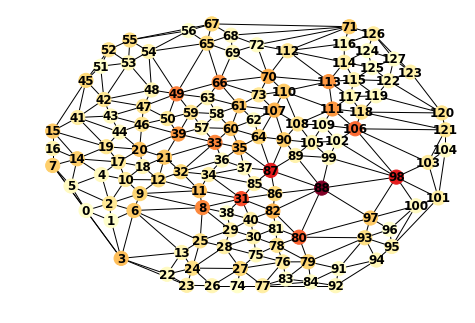

In [128]:
nx.draw(nx.empty_graph())
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_size = 200, node_color =b_rgbs)
nx.draw_networkx_labels(G, pos, font_weight='bold');

#### Exercise

Use ipywidgets to highlight the most central nodes

##### Solution

In [185]:
def rgb_bet(bet):
    return cm.get_cmap('YlOrRd')((bet-min(bl))/float((max(bl)-min(bl))))

In [186]:
type(nx.betweenness_centrality(G))

dict

In [187]:
def bet_cent_netw(th):
    
    G_sel=nx.Graph()
    G_bet=nx.betweenness_centrality(G)
    edge_sel=[ii for ii in list(G.edges) if G_bet[ii[0]]>=th and G_bet[ii[1]]>=th]
    #print edge_sel
    G_sel.add_edges_from(edge_sel)
    nx.draw(nx.empty_graph())
    nx.draw_networkx_edges(G_sel, pos, edgelist=G_sel.edges)
    new_rgbs=[rgb_bet(G_bet[i]) for i in list(G_sel.nodes)]
    nx.draw_networkx_nodes(G_sel, pos, nodelist=G_sel.nodes, node_size = 100, node_color =new_rgbs)
    
    plt.xlim(0,800)
    plt.ylim(0,800)

    #nx.draw(G_sel, pos=pos, node_size = 100, node_color='darkturquoise', with_labels=True, font_weight='bold')
    plt.show()

In [190]:
max(bl)

0.18328576559881593

In [191]:
interact(bet_cent_netw, th=FloatSlider(min=min(bl), max=max(bl), step=0.001))#, continuous_update=False))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuMDAwODU0MDA4NDMxMjY0OTI5NywgZGVzY3JpcHRpb249dSd0aCcsIG1heD0wLjE4MzI4NTc2NTU5ODgxNTkzLCBtaW7igKY=


<function __main__.bet_cent_netw>

### Closeness centrality

In [203]:
def node_distance(G,root_node):
    queue=[]
    list_distances=[]
    queue.append(root_node)
    #deleting the old keys
    if G.node[root_node].has_key('distance'):
        for n in G.nodes():
            del G.node[n]['distance']
    G.node[root_node]["distance"]=0
    while len(queue):
        working_node=queue.pop(0)
        for n in G.neighbors(working_node):
            if len(G.node[n])==0:
                G.node[n]["distance"]=G.node[working_node] \
                ["distance"]+1
                queue.append(n)
    for n in G.nodes():
        list_distances.append(((root_node,n),G.node[n]["distance"]))
    return list_distances

Average distance of all nodes from node $i$:
$\langle d_i\rangle=\dfrac{\sum_{j\in V/\{i\}} d_{ij}}{N-1}=\sum_{j\in V/\{i\}} \dfrac{d_{ij}}{N-1}$

$c_i=\dfrac{1}{\langle d_i\rangle}$

In [205]:
norm=0.0
diz_c={}
l_values=[]
for n in G.nodes():
    l=node_distance(G,n)
    ave_length=0
    for path in l:
        ave_length+=float(path[1])/(G.number_of_nodes()-1-0)
    norm+=1/ave_length
    diz_c[n]=1/ave_length
    l_values.append(diz_c[n])

In [209]:
diz_c

{'0': 0.16754617414248044,
 '1': 0.1720867208672089,
 '10': 0.1915535444947212,
 '100': 0.18870728083209531,
 '101': 0.18898809523809548,
 '102': 0.1972049689440996,
 '103': 0.1965944272445823,
 '104': 0.17373461012311925,
 '105': 0.20650406504065066,
 '106': 0.20888157894736872,
 '107': 0.22125435540069718,
 '108': 0.21166666666666697,
 '109': 0.19389312977099266,
 '11': 0.21972318339100377,
 '110': 0.20853858784893298,
 '111': 0.20616883116883142,
 '112': 0.18649045521292243,
 '113': 0.20031545741324946,
 '114': 0.17445054945054972,
 '115': 0.17162162162162187,
 '116': 0.1664482306684144,
 '117': 0.1848617176128096,
 '118': 0.1895522388059704,
 '119': 0.17092866756393027,
 '12': 0.21166666666666697,
 '120': 0.17162162162162187,
 '121': 0.18220946915351532,
 '122': 0.1626120358514727,
 '123': 0.1632390745501288,
 '124': 0.15544675642594882,
 '125': 0.1531966224366709,
 '126': 0.16282051282051307,
 '127': 0.152644230769231,
 '13': 0.17787114845938398,
 '14': 0.17912552891396355,
 '15':

In [208]:
nx.closeness_centrality(G)

{'0': 0.16754617414248021,
 '1': 0.17208672086720866,
 '10': 0.19155354449472098,
 '100': 0.1887072808320951,
 '101': 0.18898809523809523,
 '102': 0.1972049689440994,
 '103': 0.19659442724458204,
 '104': 0.17373461012311903,
 '105': 0.20650406504065041,
 '106': 0.20888157894736842,
 '107': 0.22125435540069685,
 '108': 0.21166666666666667,
 '109': 0.19389312977099238,
 '11': 0.21972318339100347,
 '110': 0.20853858784893267,
 '111': 0.20616883116883117,
 '112': 0.18649045521292218,
 '113': 0.20031545741324921,
 '114': 0.17445054945054944,
 '115': 0.17162162162162162,
 '116': 0.16644823066841416,
 '117': 0.1848617176128093,
 '118': 0.18955223880597014,
 '119': 0.17092866756393002,
 '12': 0.21166666666666667,
 '120': 0.17162162162162162,
 '121': 0.18220946915351507,
 '122': 0.16261203585147246,
 '123': 0.16323907455012854,
 '124': 0.1554467564259486,
 '125': 0.15319662243667068,
 '126': 0.16282051282051282,
 '127': 0.15264423076923078,
 '13': 0.17787114845938376,
 '14': 0.17912552891396333

In [210]:
type(nx.closeness_centrality(G))

dict

In [211]:
cc=nx.closeness_centrality(G)

In [212]:
cl=[]
for n in G.nodes():
    cl.append(cc[n])

In [213]:
c_colors =[(n-min(cl))/float((max(cl)-min(cl))) for n in cl]
c_rgbs = [cm.get_cmap('YlOrRd')(color) for color in c_colors]

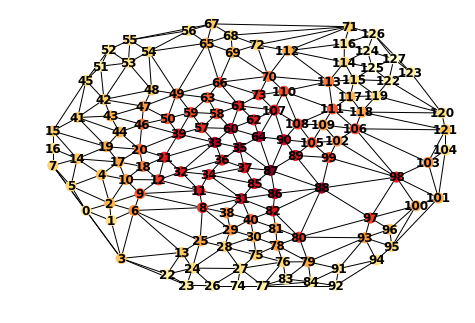

In [214]:
nx.draw(nx.empty_graph())
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_size = 100, node_color =c_rgbs)
nx.draw_networkx_labels(G, pos, font_weight='bold');

#### Exercise

Use ipywidgets to highlight the most central nodes

##### Solution

In [215]:
def rgb_clo(clo):
    return cm.get_cmap('YlOrRd')((clo-min(cl))/float((max(cl)-min(cl))))

In [216]:
def clo_cent_netw(th):
    
    G_sel=nx.Graph()
    G_clo=nx.closeness_centrality(G)
    edge_sel=[ii for ii in list(G.edges) if G_clo[ii[0]]>=th and G_clo[ii[1]]>=th]
    #print edge_sel
    G_sel.add_edges_from(edge_sel)
    nx.draw(nx.empty_graph())
    nx.draw_networkx_edges(G_sel, pos, edgelist=G_sel.edges)
    new_rgbs=[rgb_clo(G_clo[i]) for i in list(G_sel.nodes)]
    nx.draw_networkx_nodes(G_sel, pos, nodelist=G_sel.nodes, node_size = 100, node_color =new_rgbs)
    
    plt.xlim(0,800)
    plt.ylim(0,800)

    #nx.draw(G_sel, pos=pos, node_size = 100, node_color='darkturquoise', with_labels=True, font_weight='bold')
    plt.show()

In [217]:
interact(clo_cent_netw, th=FloatSlider(min=min(cl), max=max(cl), step=0.01))#, continuous_update=False))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuMTUyNjQ0MjMwNzY5MjMwNzgsIGRlc2NyaXB0aW9uPXUndGgnLCBtYXg9MC4yNDA5ODY3MTcyNjc1NTIyLCBtaW49MC7igKY=


<function __main__.clo_cent_netw>